In [1]:
import pandas as pd
import matplotlib as pyplt
import seaborn as sns
import numpy as np


In [2]:
df=pd.read_csv("stroke_detect.csv")

In [3]:
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum()) #missing values

df.fillna(df.median(numeric_only=True),inplace=True)

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 e

In [4]:
#preprocessing the data
from sklearn.preprocessing import StandardScaler,LabelEncoder

le=LabelEncoder()
df['id']=le.fit_transform(df['id'])
df['gender']=le.fit_transform(df['gender'])
df['ever_married']=le.fit_transform(df['ever_married'])
df['work_type']=le.fit_transform(df['work_type'])
df['smoking_status']=le.fit_transform(df['smoking_status'])
df['stroke']=le.fit_transform(df['stroke'])
df['bmi']=le.fit_transform(df['bmi'])
 

Categorical to numerical conversion

In [8]:
#encoding the categorical values into numerical values using OneHotEncoding

categorical_columns=['gender','ever_married','work_type','Residence_type','smoking_status']
#Missing categorical vlaues
for col in df.columns:
    if df[col].dtype =='object':
        df[col].fillna(df[col].mode()[0], inplace=True)

In [13]:
df.columns
#hot-one encoded column names and feature

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke', 'gender_1', 'gender_2', 'ever_married_1',
       'work_type_1', 'work_type_2', 'work_type_3', 'work_type_4',
       'Residence_type_Urban', 'smoking_status_1', 'smoking_status_2',
       'smoking_status_3'],
      dtype='object')

In [22]:

print(x_train.shape, y_train.shape)  # Ensure they match
print(x_test.shape, y_test.shape)  


(4088, 17) (1022,)
(1022, 17) (4088,)


Drop column(s) & Split

In [25]:
from sklearn.model_selection import train_test_split

x=df.drop(columns=['stroke'])
y = df['stroke'].values.ravel()  # Flatten target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


Standardize the numerical values

In [26]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
#standardized numerical values

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

models={
    "KNN": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(),
    "SVC": SVC(probability=True) ,
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(use_label_encoder=False,eval_metric='logloss'),
    "Neural Network":  MLPClassifier(max_iter=500)
    
}


Classification Report and Confusion Martix

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.25      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.60      0.51      0.51      1022
weighted avg       0.92      0.95      0.93      1022



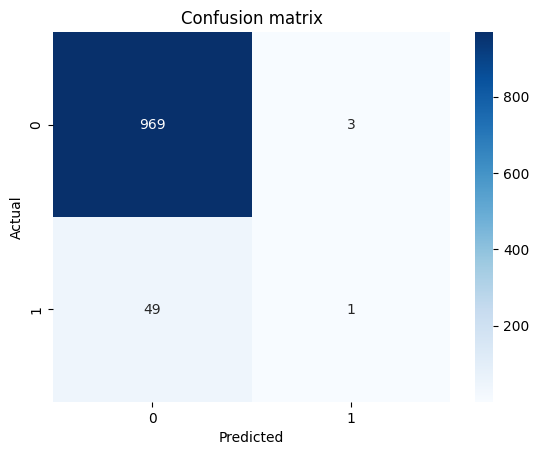

accuracy: 0.9491
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       972
           1       0.67      0.04      0.08        50

    accuracy                           0.95      1022
   macro avg       0.81      0.52      0.53      1022
weighted avg       0.94      0.95      0.93      1022



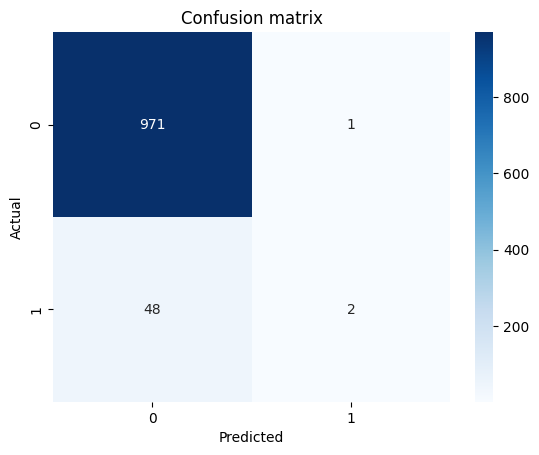

accuracy: 0.9521
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



C:\Users\sehga\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sehga\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sehga\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

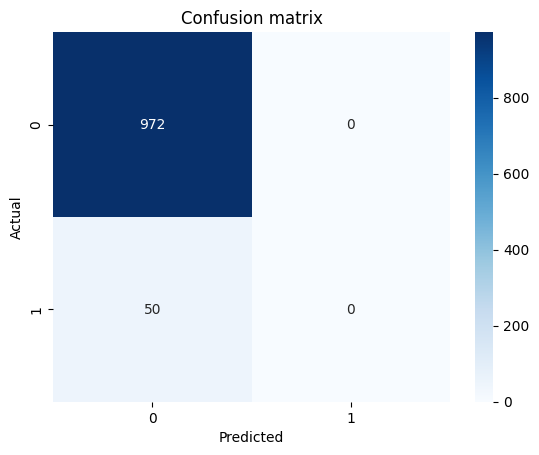

accuracy: 0.9511
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       972
           1       0.14      0.12      0.13        50

    accuracy                           0.92      1022
   macro avg       0.55      0.54      0.54      1022
weighted avg       0.91      0.92      0.92      1022



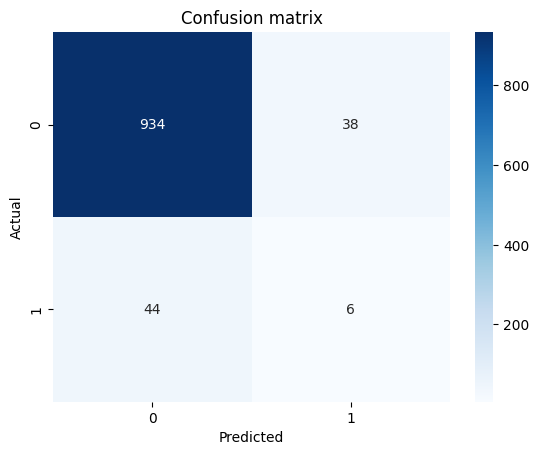

accuracy: 0.9198
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



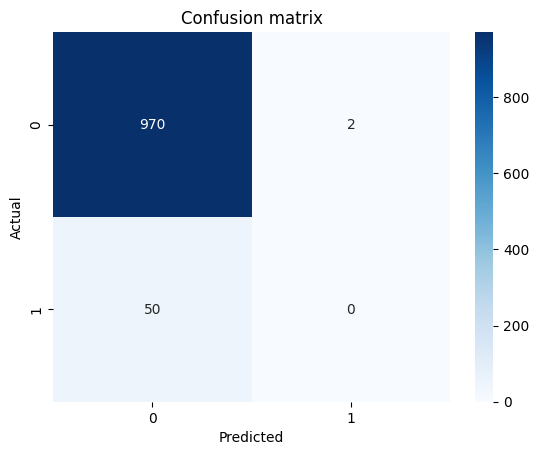

accuracy: 0.9491
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.31      0.08      0.13        50

    accuracy                           0.95      1022
   macro avg       0.63      0.54      0.55      1022
weighted avg       0.92      0.95      0.93      1022



c:\Users\sehga\miniconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:48:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


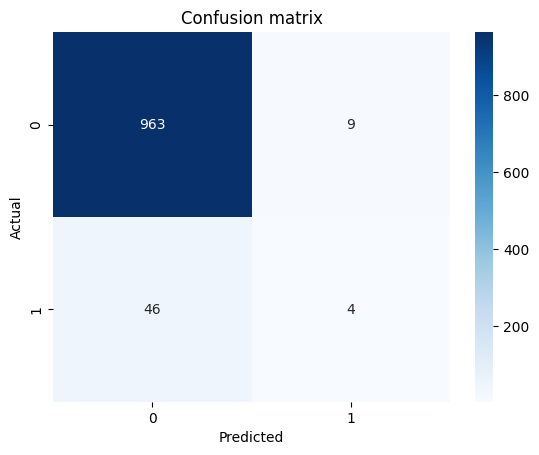

accuracy: 0.9462
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       972
           1       0.20      0.10      0.13        50

    accuracy                           0.94      1022
   macro avg       0.58      0.54      0.55      1022
weighted avg       0.92      0.94      0.93      1022



C:\Users\sehga\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


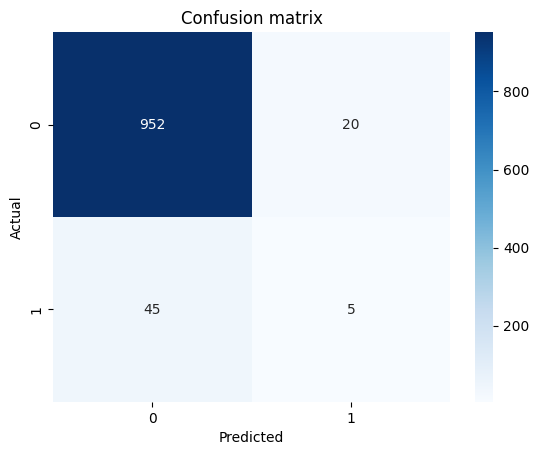

accuracy: 0.9364


In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt  # Importing plt for plotting

accuracy = {}

for name, model in models.items():
	model.fit(x_train, y_train)
	y_pred = model.predict(x_test)
	acc = accuracy_score(y_test, y_pred)
	accuracy[name] = acc
	print(classification_report(y_test, y_pred))

	sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
	plt.title("Confusion matrix")
	plt.xlabel("Predicted")
	plt.ylabel("Actual")
	plt.show()

	print(f"accuracy: {acc:.4f}")





C:\Users\sehga\AppData\Local\Temp\ipykernel_3432\2910103645.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy.keys()), y=list(accuracy.values()), palette='viridis')


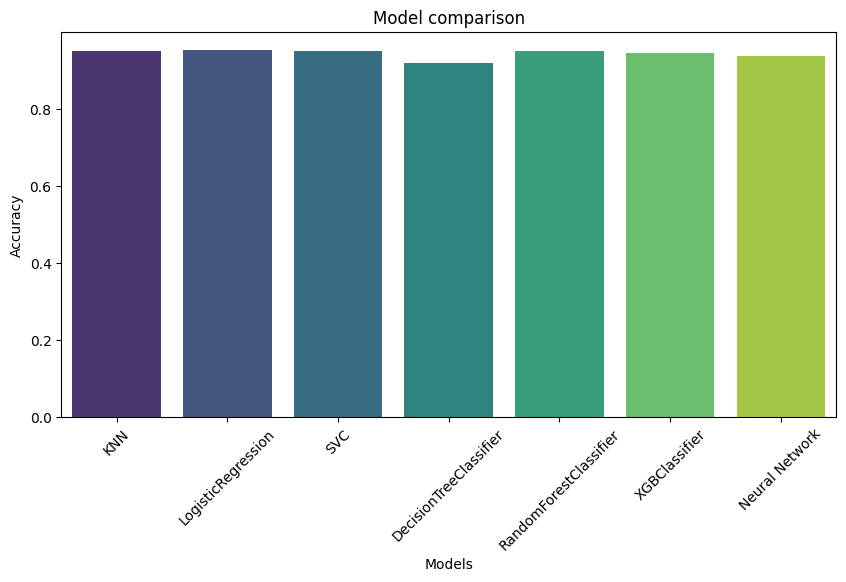

Stroke classification completed


In [39]:
import matplotlib.pyplot as plt  # Ensure plt is imported
plt.figure(figsize=(10, 5))
sns.barplot(x=list(accuracy.keys()), y=list(accuracy.values()), palette='viridis')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model comparison")
plt.xticks(rotation=45)
plt.show()

print("Stroke classification completed")